## Load df

In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
project_dir = os.path.relpath(os.path.join(os.getcwd(), os.pardir))
features_dir = os.path.join(project_dir, "features")

#TODO: argument for dataset folder name
dataset_dir = os.path.join(features_dir, "music_audio_benchmark")

csv_file_name = "features.csv"
csv_file_path = os.path.join(dataset_dir, csv_file_name)

In [3]:
print("=== ORIGINAL DF ===")
df = pd.read_csv(csv_file_path)
display(df.head())

feature_columns =[
        'name', 'duration', 'tempo', 
        'chroma_key', 'mean_root_square_mean', 'mean_zero_crossing_rate', 
        'mean_spectral_centroid', 'mean_spectral_bandwith', 'mean_spectral_roll_off', 
        'label'
    ]

print("=== FEATURES ===")
df_features = df[feature_columns].copy()
display(df_features.head())

path_columns = [
    'name',
    'path', 'path_spectogram_img', 'path_spectogram_arr', 
    'path_mel_spectogram_img', 'path_mel_spectogram_arr', 'path_chromagram_img',
    'path_chromagram_arr', 'path_mfccs_arr', 'label'
]

print("=== PATHS ===")
df_paths = df[path_columns].copy()
display(df_paths.head())

=== ORIGINAL DF ===


,name,duration,tempo,chroma_key,mean_root_square_mean,mean_zero_crossing_rate,mean_spectral_centroid,mean_spectral_bandwith,mean_spectral_roll_off,path,path_spectogram_img,path_spectogram_arr,path_mel_spectogram_img,path_mel_spectogram_arr,path_chromagram_img,path_chromagram_arr,path_mfccs_arr,label
0,50_Minutes-Colours,10.057,76.000,B,0.190,0.022,1655.830,2608.513,3622.496,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
1,50_Minutes-Nightwalk,10.057,123.047,F,0.118,0.017,866.198,1545.713,1512.838,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
2,50_Minutes-The_Great_Wall,10.057,132.512,C,0.203,0.024,1402.899,2211.316,2953.923,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
3,Abigail_Lapell-Dress_Rehearsal,10.057,143.555,G,0.123,0.045,2218.057,2839.679,4639.921,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
4,Albino_Catfish-Ice_Cream,10.057,132.512,C#,0.153,0.074,2667.951,2712.802,5195.016,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative


=== FEATURES ===


,name,duration,tempo,chroma_key,mean_root_square_mean,mean_zero_crossing_rate,mean_spectral_centroid,mean_spectral_bandwith,mean_spectral_roll_off,label
0,50_Minutes-Colours,10.057,76.000,B,0.190,0.022,1655.830,2608.513,3622.496,alternative
1,50_Minutes-Nightwalk,10.057,123.047,F,0.118,0.017,866.198,1545.713,1512.838,alternative
2,50_Minutes-The_Great_Wall,10.057,132.512,C,0.203,0.024,1402.899,2211.316,2953.923,alternative
3,Abigail_Lapell-Dress_Rehearsal,10.057,143.555,G,0.123,0.045,2218.057,2839.679,4639.921,alternative
4,Albino_Catfish-Ice_Cream,10.057,132.512,C#,0.153,0.074,2667.951,2712.802,5195.016,alternative


=== PATHS ===


,name,path,path_spectogram_img,path_spectogram_arr,path_mel_spectogram_img,path_mel_spectogram_arr,path_chromagram_img,path_chromagram_arr,path_mfccs_arr,label
0,50_Minutes-Colours,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
1,50_Minutes-Nightwalk,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
2,50_Minutes-The_Great_Wall,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
3,Abigail_Lapell-Dress_Rehearsal,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
4,Albino_Catfish-Ice_Cream,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative


In [4]:
path_arr_columns = [
    'path_spectogram_arr',
    'path_mel_spectogram_arr',
    'path_chromagram_arr',
    'path_mfccs_arr'
]


def load_numpy_array(path):
    return np.load(path)


def calculate_mean(path):
    arr = load_numpy_array(path)
    return np.mean(arr)


def calculate_mean_across_column(path):
    arr = load_numpy_array(path)
    return np.mean(arr, axis=1)

In [5]:
# for column in path_arr_columns:
#     path = df_paths[column][0]
#     n_arr = load_numpy_array(path)
#     print(n_arr.shape)
    
#     mean_n_arr = calculate_mean_across_column(path)
#     print(mean_n_arr.shape)
    
#     if column == 'path_spectogram_arr':
#         print(mean_n_arr)

In [6]:
def get_mean_df():
    mean_df = pd.DataFrame()

    for column in path_arr_columns:
        mean_column_name = column.replace('path', 'mean')
        mean_column_name = mean_column_name.replace('_arr', '')
        mean_df[mean_column_name] = df_paths[column].apply(
            lambda path: calculate_mean(path)
        )

#     print("=== MEAN PATHS ===")
#     print(mean_df)
    return mean_df

def get_mean_by_column_df(column_name):    
    means_series = df_paths[column_name].apply(calculate_mean_across_column) 
    mean_df = pd.DataFrame(means_series.tolist(), index=df_paths.index)
    mean_df.columns = [f'{column_name}_{index}' for index in mean_df.columns]
    return mean_df

In [207]:
# mean_df = get_mean_df()
long_mean_df = get_mean_by_column_df('path_mel_spectogram_arr')
long_mean_df.head()

,path_mel_spectogram_arr_0,path_mel_spectogram_arr_1,path_mel_spectogram_arr_2,path_mel_spectogram_arr_3,path_mel_spectogram_arr_4,path_mel_spectogram_arr_5,path_mel_spectogram_arr_6,path_mel_spectogram_arr_7,path_mel_spectogram_arr_8,path_mel_spectogram_arr_9,...,path_mel_spectogram_arr_118,path_mel_spectogram_arr_119,path_mel_spectogram_arr_120,path_mel_spectogram_arr_121,path_mel_spectogram_arr_122,path_mel_spectogram_arr_123,path_mel_spectogram_arr_124,path_mel_spectogram_arr_125,path_mel_spectogram_arr_126,path_mel_spectogram_arr_127
0,-58.203617,-34.402195,-30.114492,-33.262497,-39.806404,-46.529343,-44.789753,-42.970860,-46.569817,-51.054165,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0
1,-39.128567,-27.689018,-31.699230,-36.670872,-24.256109,-24.056656,-23.395418,-35.692940,-27.340900,-27.112755,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0
2,-37.600735,-34.791550,-31.075542,-23.985970,-21.723801,-26.004190,-30.452232,-33.637115,-38.702526,-48.975147,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0
3,-74.032196,-66.249573,-52.900433,-49.905548,-45.989845,-40.752586,-45.666920,-54.267418,-55.898689,-61.274681,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0
4,-77.878029,-65.060028,-51.012836,-42.259350,-47.027035,-46.643017,-41.929413,-45.086006,-43.277809,-44.939941,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0


In [8]:
def show_df_summary(df):
    # Info
    print("\nDataFrame information:")
    print(df.info())
    print()
    
    # Null value
    print("Null values per column:")
    print(df.isnull().sum())
    print()

    # Shape
    print("\nDataFrame dimensions (rows, columns):")
    print(df.shape)
    print()

    # Column names
    print("\nColumn names:")
    print(df.columns)
    print()

    # Unique values
    print("\nNumber of unique values in each column:")
    print(df.nunique())
    print()

    # Descriptive statistics for numeric columns
    print("\nDescriptive statistics for numeric columns:")
    print(df.describe())
    print()

    # Frequency of unique values in each column
    print("\nFrequency of unique values in each column:")
    for column in df.columns:
        if df[column].dtype == 'object':
            print(f"\n{column}:")
            print(df[column].value_counts())

In [155]:
# show_df_summary(df)

## Prepare data for clustering

In [156]:
from sklearn.preprocessing import MinMaxScaler
import re

In [208]:
def get_features_df(df, df_features):
    df = df_features.drop(columns=['name', 'label', 'mean_spectral_centroid', 'mean_spectral_roll_off'])
    
    unique_chroma_key_values = df['chroma_key'].unique()
    mapping_dict_chroma = {value: index for index, value in enumerate(unique_chroma_key_values)}
    df['chroma_key'] = df['chroma_key'].map(mapping_dict_chroma)

    return df


def concat_df(df, df_to_concat):
    df = pd.concat([df, df_to_concat], axis=1)
    return df


def normalize_features(df):
    columns_to_normalize = []

    feature_columns = get_feature_columns()
    if all(col in df for col in feature_columns):
        columns_to_normalize += feature_columns
        
    mean_columns = get_mean_columns()
    if all(col in df for col in mean_columns):
        columns_to_normalize += mean_columns

    columns_to_normalize += get_long_means_columns(df)
    
    scaler = MinMaxScaler()
    df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    
    return df


def normalize_all_features(df):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)
    df = pd.DataFrame(scaled_data, columns=df.columns)
    return df


def get_feature_columns():
    return ['duration', 'tempo', 'mean_root_square_mean', 'mean_zero_crossing_rate', 'mean_spectral_bandwith']


def get_mean_columns():
    return ['mean_spectogram', 'mean_mel_spectogram', 'mean_chromagram', 'mean_mfccs']


def get_long_mean_columns(df):
    path_pattern = re.compile(r'^path_.*_arr_.*$') # path_*_arr_
    return [col for col in df.columns if path_pattern.match(col)]


def feature_one_hot_encoding(df, column_name):
    df[column_name] = df[column_name].astype('category')
    df = pd.get_dummies(df, columns=[column_name], dtype=float)
    return df

In [209]:
df_to_cluster = pd.DataFrame()

# df_to_cluster = get_features_df(df_to_cluster, df_features)
# df_to_cluster = concat_df(df_to_cluster, mean_df)
df_to_cluster = concat_df(df_to_cluster, long_mean_df)
df_to_cluster = normalize_features(df_to_cluster)
# df_to_cluster = feature_one_hot_encoding(df_to_cluster, 'chroma_key')

df_to_cluster

,path_mel_spectogram_arr_0,path_mel_spectogram_arr_1,path_mel_spectogram_arr_2,path_mel_spectogram_arr_3,path_mel_spectogram_arr_4,path_mel_spectogram_arr_5,path_mel_spectogram_arr_6,path_mel_spectogram_arr_7,path_mel_spectogram_arr_8,path_mel_spectogram_arr_9,...,path_mel_spectogram_arr_118,path_mel_spectogram_arr_119,path_mel_spectogram_arr_120,path_mel_spectogram_arr_121,path_mel_spectogram_arr_122,path_mel_spectogram_arr_123,path_mel_spectogram_arr_124,path_mel_spectogram_arr_125,path_mel_spectogram_arr_126,path_mel_spectogram_arr_127
0,0.332112,0.638728,0.730169,0.717834,0.632226,0.529255,0.572411,0.636390,0.534281,0.446913,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,0.622760,0.732766,0.706973,0.665485,0.877214,0.890152,0.930686,0.763796,0.846433,0.819816,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,0.646040,0.633274,0.716102,0.860311,0.917109,0.858876,0.812510,0.799785,0.661995,0.479295,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,0.090932,0.192614,0.396653,0.462216,0.534809,0.622026,0.557721,0.438634,0.382841,0.287722,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,0.032333,0.209277,0.424282,0.579653,0.518469,0.527429,0.620311,0.599362,0.587722,0.542146,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,0.411805,0.660588,0.751625,0.818187,0.814513,0.784992,0.746726,0.677959,0.719516,0.641057,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1882,0.677502,0.839351,0.866727,0.849612,0.757287,0.710801,0.751347,0.612638,0.518444,0.381186,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1883,0.422393,0.702683,0.818298,0.783017,0.683423,0.584074,0.628609,0.546641,0.529598,0.481737,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1884,0.583521,0.777616,0.831472,0.849164,0.783293,0.642094,0.615875,0.549780,0.539395,0.458761,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [80]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from itertools import cycle

print(f"Interactive mode: {matplotlib.is_interactive()}")
print(f"matplotlib backend: {matplotlib.rcParams['backend']}")

color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

Interactive mode: True
matplotlib backend: module://matplotlib_inline.backend_inline


In [180]:
def get_correlation_matrix(df):
    # Filter chroma key and path_*_arr_ in correlation analysis
    df_correlation = df.filter(regex='^(?!chroma_key)').filter(regex='^(?!path_.*_arr_.*$)')
    correlation_matrix = df_correlation.corr()
    
    return correlation_matrix, df_correlation


def show_correlation_matrix(correlation_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix Heatmap')
    plt.show()

    
def show_correlation_pairs(df_correlation):
    sns.pairplot(df_correlation)
    plt.show()

In [90]:
# correlation_matrix, df_correlation = get_correlation_matrix(df_to_cluster)
# show_correlation(correlation_matrix)

In [91]:
# show_correlation_pairs(df_correlation)

## PCA

In [93]:
from sklearn.decomposition import PCA

In [210]:
def show_explained_variance(df):
    pca = PCA().fit(df)

    plt.rcParams["figure.figsize"] = (12,6)

    fig, ax = plt.subplots()
    xi = np.arange(1, df.shape[1] + 1, step=1)
    y = np.cumsum(pca.explained_variance_ratio_)

    plt.ylim(0.0,1.1)
    plt.plot(xi, y, marker='o', linestyle='--', color='b')

    plt.xlabel('Number of Components')
    plt.xticks(np.arange(0, df.shape[1] + 50, step=50))
    plt.ylabel('Cumulative variance (%)')
    plt.title('The number of components needed to explain variance')

    plt.axhline(y=0.95, color='r', linestyle='-')
    plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

    ax.grid(axis='x')
    plt.show()

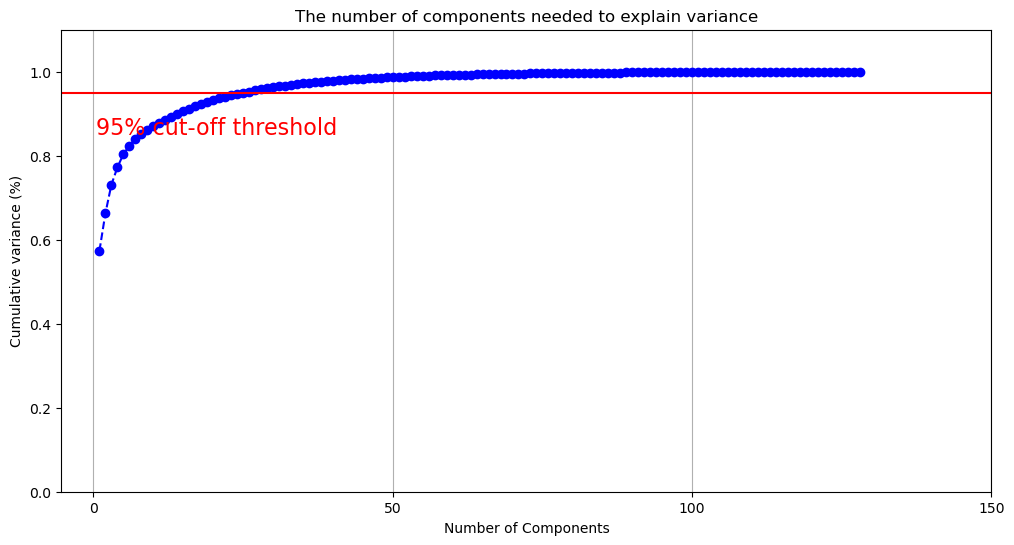

In [211]:
show_explained_variance(df_to_cluster)

In [214]:
N_COMPONENTS = 25

pca = PCA(n_components=N_COMPONENTS)
pca.fit(df_to_cluster)

explained_variance = pca.explained_variance_ratio_
# print(explained_variance[:10])
print("Sum of Explained Variance:", sum(explained_variance))

Sum of Explained Variance: 0.9501117672771215


In [215]:
pca_data = pca.transform(df_to_cluster)
pca_columns = [f'PCA_{i + 1}' for i in range(N_COMPONENTS)]
pca_df = pd.DataFrame(data=pca_data, columns=pca_columns)
pca_df

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25
0,-1.360701,-0.261096,-0.062549,0.359851,-0.161581,-0.037562,0.001306,0.059750,-0.086668,-0.005179,...,0.183661,-0.055193,-0.051353,0.042433,-0.002105,0.062978,-0.114750,-0.040555,0.113048,-0.034890
1,-0.758544,-0.955566,-0.170592,0.813282,-0.292503,-0.160706,-0.094160,-0.118832,0.000996,0.132502,...,-0.312534,0.228217,-0.130568,0.117687,0.074567,-0.076633,0.006554,-0.000497,-0.071649,0.025845
2,-0.560123,-0.546606,-0.104698,0.272853,-0.264048,0.220326,0.193889,0.346388,-0.056826,0.101058,...,0.162469,0.042548,-0.162812,0.119662,-0.091318,0.020328,-0.056958,-0.004750,-0.195566,0.046859
3,-0.732609,0.060917,0.014372,-0.403118,0.221793,-0.288960,0.156505,0.242844,0.181601,0.003579,...,0.114658,0.188024,-0.093392,0.013932,0.051911,-0.046678,-0.033104,-0.103380,-0.051881,0.044215
4,0.405903,0.438198,0.069962,-0.103986,-0.156331,-0.871017,0.535304,-0.600241,-0.314534,-0.008158,...,-0.318188,0.180463,0.042982,-0.124805,-0.103056,0.059234,-0.020148,-0.226556,-0.050412,0.097540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,2.486358,-0.063336,0.019165,-0.219289,-0.469285,-0.483838,-0.274227,-0.223201,0.235653,-0.058008,...,0.083200,-0.093817,-0.175659,-0.081246,0.005655,-0.050375,-0.177026,0.001339,-0.144451,0.215781
1882,0.028781,-0.005635,-0.012690,0.449862,-0.262177,0.270116,-0.025157,-0.115498,0.116356,0.200939,...,0.025617,-0.038246,0.008739,-0.016917,0.014502,0.006709,0.080849,0.026034,-0.083145,0.027820
1883,0.147019,-0.180169,-0.037063,-0.091297,-0.238699,0.072378,0.003421,0.004039,-0.068971,-0.170047,...,-0.003080,0.073351,0.081255,0.056878,0.136454,0.107904,-0.079773,-0.138876,-0.006644,0.071656
1884,1.824594,0.807420,0.144967,0.179964,-0.093253,0.194680,0.501384,-0.443755,0.070908,-0.022926,...,-0.101333,0.243278,0.035618,0.042531,0.323748,-0.116904,-0.178900,-0.093221,0.087348,0.055908


## Get number of clusters

In [216]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

### Elbow method

In [217]:
def elbow_method(X, max_clusters):
    inertia = list()
    for i in range(2, max_clusters):
        kmeans = KMeans(n_clusters = i, n_init='auto')
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    plt.plot(range(2, max_clusters), inertia)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

=== BEFORE PCA ===


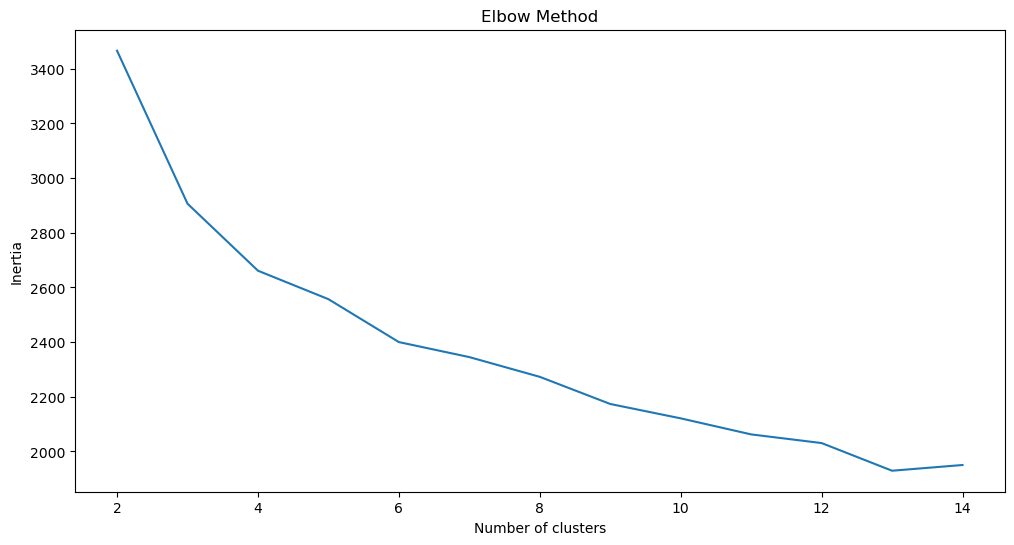

=== AFTER PCA ===


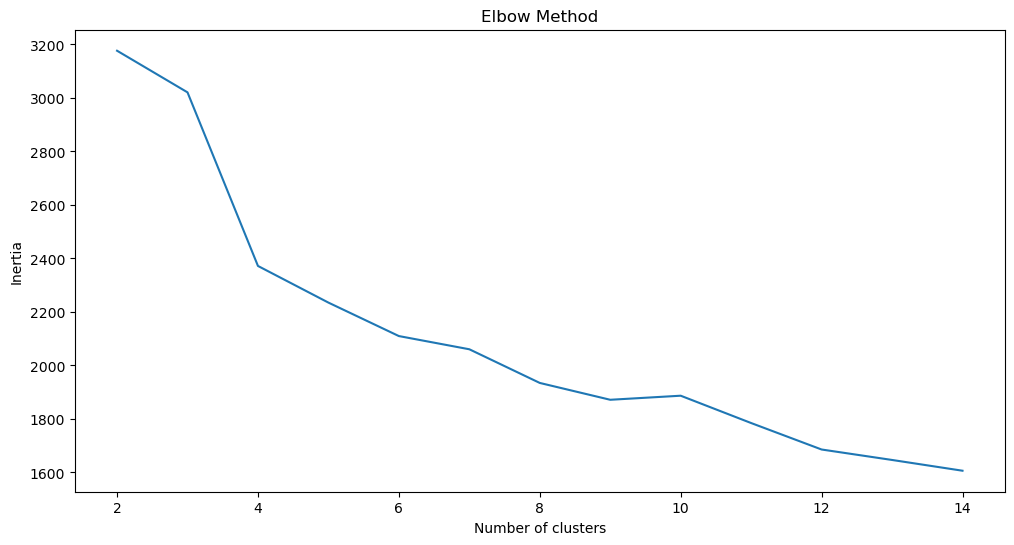

In [218]:
print("=== BEFORE PCA ===")
elbow_method(df_to_cluster, 15)

print("=== AFTER PCA ===")
elbow_method(pca_df, 15)

### Silhouette analysis

In [204]:
def silhouette_analysis(X, max_clusters):
    range_n_clusters =  list(range(2, max_clusters + 1))
    
    best_score = -1
    best_score_clusters = -1
    
    for n_clusters in range_n_clusters:
        fig, ax1 = plt.subplots()
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=23, n_init='auto')
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print(f'For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg}')
        if (silhouette_avg > best_score):
            best_score = silhouette_avg
            best_score_clusters = n_clusters
            
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7
            )

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10


        ax1.set_title(f"The silhouette plot for {n_clusters} clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    #     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #     ax2.scatter(
    #         X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    #     )

    #     centers = clusterer.cluster_centers_
    #     ax2.scatter(
    #         centers[:, 0],
    #         centers[:, 1],
    #         marker="o",
    #         c="white",
    #         alpha=1,
    #         s=200,
    #         edgecolor="k",
    #     )

    #     for i, c in enumerate(centers):
    #         ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    #     ax2.set_title("The visualization of the clustered data.")
    #     ax2.set_xlabel("Feature space for the 1st feature")
    #     ax2.set_ylabel("Feature space for the 2nd feature")

    #     plt.suptitle(
    #         "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    #         % n_clusters,
    #         fontsize=14,
    #         fontweight="bold",
    #     )


    plt.show()
    return best_score_clusters, best_score

In [ ]:
silh_n_clusters, silh_score = silhouette_analysis(pca_df, 15)
# silh_n_clusters, silh_score = silhouette_analysis(df_to_cluster, 15)

For n_clusters = 2, The average silhouette_score is : 0.3871278464794159
For n_clusters = 3, The average silhouette_score is : 0.2627650201320648
For n_clusters = 4, The average silhouette_score is : 0.18134218454360962
For n_clusters = 5, The average silhouette_score is : 0.15233057737350464


In [172]:
silh_n_clusters, silh_score

(2, 0.38712806)

## KMeans

In [28]:
kmeans = KMeans(n_clusters=silh_n_clusters, random_state=23, n_init='auto').fit(df_to_cluster)
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 0])